<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/optuna_SVM_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# optunaを用いたSVM のハイパーパラメータの最適化

In [56]:
!pip install optuna

In [57]:
import optuna
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [58]:
# Iris Data (2 features)
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
target_names = iris.target_names

print('Size of the data = ', X.shape)

n = X.shape[0]
mdim = X.shape[1]

print('N=', n, 'mdim=', mdim)

print('size of y', y.shape)

Size of the data =  (150, 2)
N= 150 mdim= 2
size of y (150,)


## SVM with linear kernel

The best parameter C is searched

In [59]:
# 目的関数の定義
def objective_linear(trial):
    # ハイパーパラメータの範囲指定
    C = trial.suggest_float("C", 1e-2, 1e3, log=True)

    # モデルの学習
    svm = SVC(C=C, kernel='linear')
#    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)
#    print(scores)

    # モデルの評価
#    y_pred = svm.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
    accuracy = scores.mean()

    return accuracy

In [60]:
# 最適化プロセスの実行
study = optuna.create_study(direction="maximize")
study.optimize(objective_linear, n_trials=100)

# 最適化結果の表示
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

[I 2024-09-17 07:36:30,687] A new study created in memory with name: no-name-ea68f362-132f-4472-9440-115210e7b651
[I 2024-09-17 07:36:30,719] Trial 0 finished with value: 0.8133333333333332 and parameters: {'C': 296.65321606600276}. Best is trial 0 with value: 0.8133333333333332.
[I 2024-09-17 07:36:30,736] Trial 1 finished with value: 0.82 and parameters: {'C': 0.526614115863593}. Best is trial 1 with value: 0.82.
[I 2024-09-17 07:36:30,752] Trial 2 finished with value: 0.8133333333333332 and parameters: {'C': 1.4518813783032203}. Best is trial 1 with value: 0.82.
[I 2024-09-17 07:36:30,769] Trial 3 finished with value: 0.7866666666666667 and parameters: {'C': 0.03367299776768997}. Best is trial 1 with value: 0.82.
[I 2024-09-17 07:36:30,792] Trial 4 finished with value: 0.8133333333333332 and parameters: {'C': 437.15347576908323}. Best is trial 1 with value: 0.82.
[I 2024-09-17 07:36:30,810] Trial 5 finished with value: 0.8133333333333332 and parameters: {'C': 0.17672499664297367}. B

Best trial:
  Value: 0.8200000000000001
  Params: {'C': 22.367482534260443}


In [61]:
C_opt = trial.params['C']
print('Best C is ', C_opt)

svm = SVC(C=C_opt, kernel='linear')
svm.fit(X, y)
# Test Accuracy
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Train Accuracy = ', accuracy)


Best C is  22.367482534260443
Train Accuracy =  0.82


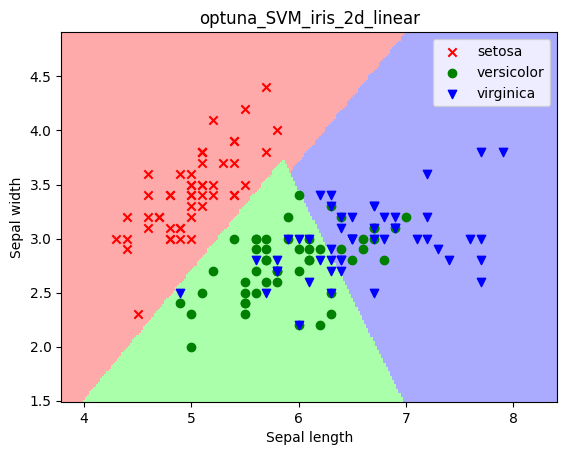

In [62]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = svm.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('optuna_SVM_iris_2d_linear')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('optuna_SVM_iris_2d_linear.png')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

## SVM with RBF kernel

The parameters C and gamma are searched

In [63]:
# 目的関数の定義
def objective_rbf(trial):
    # ハイパーパラメータの範囲指定
    C = trial.suggest_float("C", 1e-2, 1e3, log=True)
    gamma = trial.suggest_float("gamma", 1e-2, 1e2, log=True)

    # モデルの学習
    svm = SVC(C=C, kernel='rbf', gamma=gamma)
#    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)
#    print(scores)

    # モデルの評価
#    y_pred = svm.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
    accuracy = scores.mean()

    return accuracy

In [64]:
# 最適化プロセスの実行
study = optuna.create_study(direction="maximize")
study.optimize(objective_rbf, n_trials=100)

# 最適化結果の表示
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

[I 2024-09-17 07:36:36,413] A new study created in memory with name: no-name-cf46830f-dbcd-49a7-92a4-e22f5e479e47
[I 2024-09-17 07:36:36,437] Trial 0 finished with value: 0.6866666666666666 and parameters: {'C': 635.367869091993, 'gamma': 36.541966926756295}. Best is trial 0 with value: 0.6866666666666666.
[I 2024-09-17 07:36:36,473] Trial 1 finished with value: 0.7133333333333333 and parameters: {'C': 11.10502562382314, 'gamma': 21.032523782605335}. Best is trial 1 with value: 0.7133333333333333.
[I 2024-09-17 07:36:36,505] Trial 2 finished with value: 0.74 and parameters: {'C': 0.03107106533298813, 'gamma': 12.870236502307906}. Best is trial 2 with value: 0.74.
[I 2024-09-17 07:36:36,540] Trial 3 finished with value: 0.7666666666666668 and parameters: {'C': 0.13320802070193813, 'gamma': 0.026949527894463008}. Best is trial 3 with value: 0.7666666666666668.
[I 2024-09-17 07:36:36,578] Trial 4 finished with value: 0.6733333333333333 and parameters: {'C': 3.958174791682697, 'gamma': 97.

Best trial:
  Value: 0.8400000000000001
  Params: {'C': 0.2892153724841119, 'gamma': 1.4097628506478168}


In [65]:
C_opt = trial.params['C']
print('Best C is ', C_opt)
gamma_opt = trial.params['gamma']
print('Best gamma is ', gamma_opt)

svm = SVC(C=C_opt, kernel='rbf', gamma=gamma_opt)
svm.fit(X, y)
# Test Accuracy
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Train Accuracy = ', accuracy)

Best C is  0.2892153724841119
Best gamma is  1.4097628506478168
Train Accuracy =  0.8133333333333334


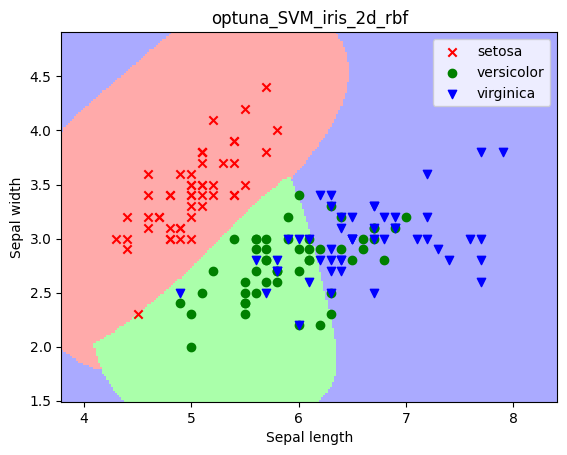

In [66]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = svm.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('optuna_SVM_iris_2d_rbf')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('optuna_SVM_iris_2d_rbf.png')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()

## SVM with polynomial kernel

The best parameters C and degree are searched.

In [67]:
# 目的関数の定義
def objective_poly(trial):
    # ハイパーパラメータの範囲指定
    C = trial.suggest_float("C", 1e-2, 1e3, log=True)
    degree = trial.suggest_int("degree", 1, 4)

    # モデルの学習
    svm = SVC(C=C, kernel='poly', degree = degree)
#    svm.fit(X_train, y_train)
    scores = cross_val_score(svm, X, y, cv=5)
#    print(scores)

    # モデルの評価
#    y_pred = svm.predict(X_test)
#    accuracy = accuracy_score(y_test, y_pred)
    accuracy = scores.mean()

    return accuracy

In [68]:
# 最適化プロセスの実行
study = optuna.create_study(direction="maximize")
study.optimize(objective_poly, n_trials=100)

# 最適化結果の表示
print("Best trial:")
trial = study.best_trial
print(f"  Value: {trial.value}")
print(f"  Params: {trial.params}")

[I 2024-09-17 07:36:46,223] A new study created in memory with name: no-name-b28fe86a-f25b-49f9-93d5-e92b9367300c
[I 2024-09-17 07:36:46,307] Trial 0 finished with value: 0.8133333333333332 and parameters: {'C': 141.0751636419147, 'degree': 2}. Best is trial 0 with value: 0.8133333333333332.
[I 2024-09-17 07:36:46,343] Trial 1 finished with value: 0.8 and parameters: {'C': 0.21058282581573692, 'degree': 1}. Best is trial 0 with value: 0.8133333333333332.
[I 2024-09-17 07:36:46,388] Trial 2 finished with value: 0.82 and parameters: {'C': 15.269115554746309, 'degree': 1}. Best is trial 2 with value: 0.82.
[I 2024-09-17 07:36:46,638] Trial 3 finished with value: 0.82 and parameters: {'C': 68.24130894783886, 'degree': 3}. Best is trial 2 with value: 0.82.
[I 2024-09-17 07:36:46,680] Trial 4 finished with value: 0.8266666666666668 and parameters: {'C': 222.9847700004295, 'degree': 1}. Best is trial 4 with value: 0.8266666666666668.
[I 2024-09-17 07:36:48,146] Trial 5 finished with value: 0.

Best trial:
  Value: 0.8266666666666668
  Params: {'C': 222.9847700004295, 'degree': 1}


In [69]:
C_opt = trial.params['C']
print('Best C is ', C_opt)
degree_opt = trial.params['degree']
print('Best degree is ', degree_opt)

svm = SVC(C=C_opt, kernel='poly', degree=degree_opt)
svm.fit(X, y)
# Test Accuracy
y_pred = svm.predict(X)
accuracy = accuracy_score(y, y_pred)
print('Train Accuracy = ', accuracy)

Best C is  222.9847700004295
Best degree is  1
Train Accuracy =  0.82


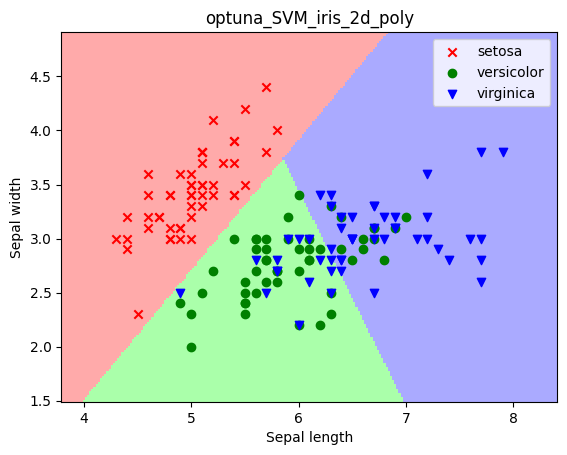

In [70]:
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

## colors
colors = ['red', 'green', 'blue']
markers = ['x', 'o', 'v']

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

(xsize, ysize) = xx.shape
nelm = xsize * ysize

XX = np.c_[xx.reshape((nelm,1)), yy.reshape((nelm,1))]
#print XX

Z = svm.predict(XX)
#print('Z\n', Z)

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
#plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
for k, c, marker, target_name  in zip([0, 1, 2], colors, markers, target_names):
    plt.scatter(X[y == k, 0], X[y == k, 1], c=c, marker=marker, label = target_name)
#plt.scatter(data[:, 0], data[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.legend()
plt.title('optuna_SVM_iris_2d_poly')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('optuna_SVM_iris_2d_poly.png')

#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())

plt.show()